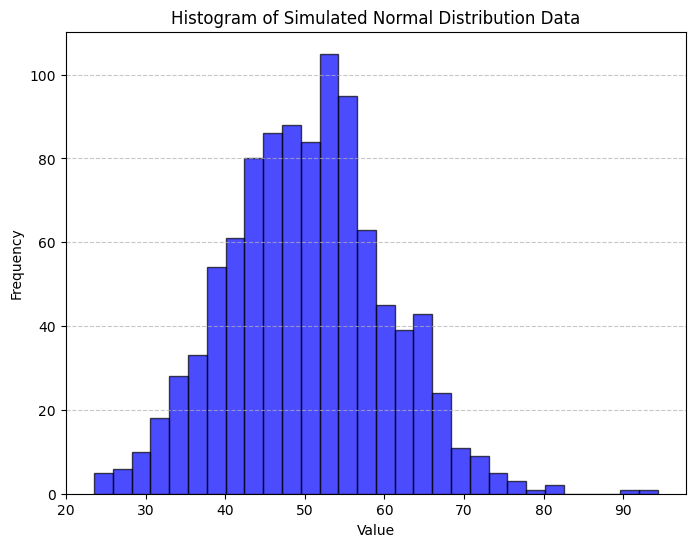

In [2]:
# 6a - Histogram of the simulated data

import numpy as np
import matplotlib.pyplot as plt

# Simulating a dataset of 1000 samples from a normal distribution
mu = 50  # Mean
sigma = 10  # Standard deviation
sample_size = 1000  # Number of samples

# Generating the data using numpy's random.normal function
data = np.random.normal(mu, sigma, sample_size)

# Ploting a histogram of the simulated data
plt.figure(figsize=(8, 6))
plt.hist(data, bins=30, edgecolor='black', alpha=0.7, color='blue')
plt.title("Histogram of Simulated Normal Distribution Data")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Estimated Mean (μ): 50.15
Estimated Standard Deviation (σ): 10.07


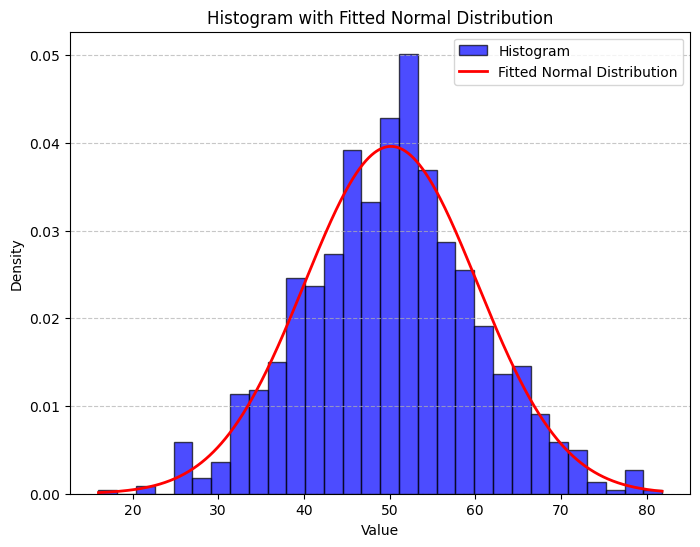

In [8]:
#6b - Normal Distribution Fitting

import numpy as np
import matplotlib.pyplot as plt

# Fitting a normal distribution using Maximum Likelihood Estimation (MLE)
# Using the dataset from part (a)
mu_estimated = np.mean(data)  # Estimating the mean using sample mean
sigma_estimated = np.std(data, ddof=0)  # Estimating the standard deviation using sample std (MLE)

print(f"Estimated Mean (μ): {mu_estimated:.2f}")
print(f"Estimated Standard Deviation (σ): {sigma_estimated:.2f}")

# Defining the PDF of a normal distribution manually
def normal_pdf(x, mu, sigma):
    """
    Compute the probability density function (PDF) of a normal distribution.
    """
    coefficient = 1 / (sigma * np.sqrt(2 * np.pi))
    exponent = -0.5 * ((x - mu) / sigma) ** 2
    return coefficient * np.exp(exponent)

# Overlaying the PDF of the fitted normal distribution on the histogram
plt.figure(figsize=(8, 6))
plt.hist(data, bins=30, density=True, edgecolor='black', alpha=0.7, color='blue', label="Histogram")

# Generating the PDF of the fitted normal distribution
x = np.linspace(min(data), max(data), 1000)  # The range of x values
pdf = normal_pdf(x, mu_estimated, sigma_estimated)  # Computing PDF values

# Plotting the PDF
plt.plot(x, pdf, 'r-', linewidth=2, label="Fitted Normal Distribution")

plt.title("Histogram with Fitted Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Estimated Mean with Outliers (μ): 53.899
Estimated Standard Deviation with Outliers (σ): 19.660

Comparison of Estimated Parameters:
Original Mean (μ): 50.149, Mean with Outliers (μ): 53.899
Original Std (σ): 10.073, Std with Outliers (σ): 19.660


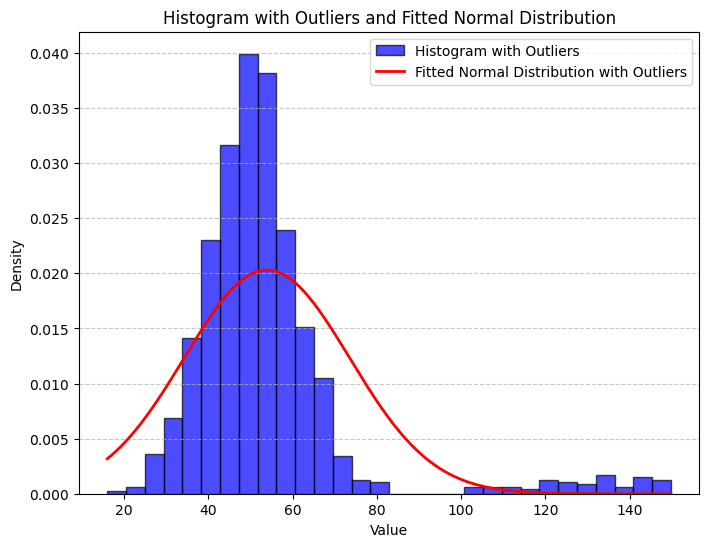


 [149.181 130.315 141.268 147.811 139.909 146.062 118.884 121.711 144.517
 118.867 148.39  132.996 137.245 132.191 143.205 140.942 120.526 117.755
 124.932 121.518 125.866 145.602 134.649 141.38  131.729 113.276 135.874
 123.802 128.668 129.53  144.409 122.625 145.11  132.642 123.32  136.57
 112.993 136.268 136.452 114.626 133.598 124.17  149.836]


In [9]:
# 6c - Handling Outliers

import numpy as np
import matplotlib.pyplot as plt

# Simulating outliers and adding them to the original dataset
# Simulating 50 samples from a uniform distribution over [100, 150]
outliers = np.random.uniform(100, 150, 50)

# Adding the outliers to the original dataset
data_with_outliers = np.concatenate([data, outliers])

# Fitting a normal distribution to the new dataset using MLE
mu_outliers_estimated = np.mean(data_with_outliers)  # Estimating the mean
sigma_outliers_estimated = np.std(data_with_outliers, ddof=0)  # Estimating the standard deviation

# Rounding the estimated parameters to 3 decimal places
mu_outliers_estimated = round(mu_outliers_estimated, 3)
sigma_outliers_estimated = round(sigma_outliers_estimated, 3)

print(f"Estimated Mean with Outliers (μ): {mu_outliers_estimated:.3f}")
print(f"Estimated Standard Deviation with Outliers (σ): {sigma_outliers_estimated:.3f}")

# Comparing the estimated parameters with and without outliers
print("\nComparison of Estimated Parameters:")
print(f"Original Mean (μ): {round(mu_estimated, 3)}, Mean with Outliers (μ): {mu_outliers_estimated:.3f}")
print(f"Original Std (σ): {round(sigma_estimated, 3)}, Std with Outliers (σ): {sigma_outliers_estimated:.3f}")

# Plotting the histogram of the new dataset with outliers
plt.figure(figsize=(8, 6))
plt.hist(data_with_outliers, bins=30, density=True, edgecolor='black', alpha=0.7, color='blue', label="Histogram with Outliers")

# Overlaying the PDF of the fitted normal distribution
x = np.linspace(min(data_with_outliers), max(data_with_outliers), 1000)
pdf_outliers = normal_pdf(x, mu_outliers_estimated, sigma_outliers_estimated)
plt.plot(x, pdf_outliers, 'r-', linewidth=2, label="Fitted Normal Distribution with Outliers")

plt.title("Histogram with Outliers and Fitted Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Detecting outliers using the Z-score method
def detect_outliers_zscore(data, threshold=3):
    """
    Detect outliers using the Z-score method.
    """
    mean = np.mean(data)
    std = np.std(data, ddof=0)
    z_scores = np.abs((data - mean) / std)  # Computing the Z-scores
    return data[z_scores > threshold]  # Returning outliers

# Detecting outliers in the dataset with outliers
outliers_detected = detect_outliers_zscore(data_with_outliers)
print("\nDetected Outliers:", np.round(outliers_detected, 3))